# Intro Manifold Spaces
```
An application of the different Manifold learning techniques on a spherical data-set. Here one can see the use of dimensionality reduction in order to gain some intuition regarding the manifold learning methods. Regarding the dataset, the poles are cut from the sphere, as well as a thin slice down its side. This enables the manifold learning techniques to ‘spread it open’ whilst projecting it onto two dimensions.

For a similar example, where the methods are applied to the S-curve dataset, see Comparison of Manifold Learning methods

Note that the purpose of the MDS is to find a low-dimensional representation of the data (here 2D) in which the distances respect well the distances in the original high-dimensional space, unlike other manifold-learning algorithms, it does not seeks an isotropic representation of the data in the low-dimensional space. Here the manifold problem matches fairly that of representing a flat map of the Earth, as with map projection

source: https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py

comparison of manifold embeddings: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py
```
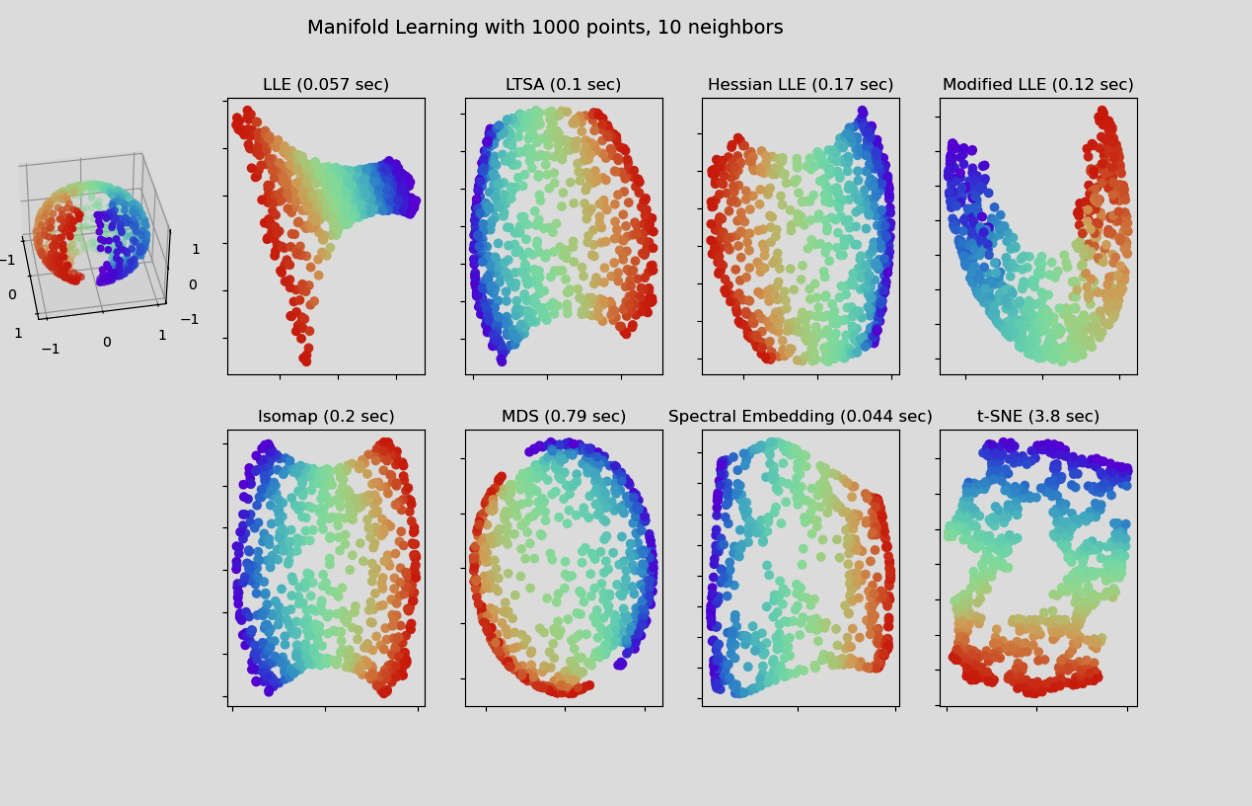

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Directory

In [ ]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/200fit_500pred'

Import Data

In [ ]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/updated_with_all_adni/master_dx_updated_fix.csv'
sheet = None

In [ ]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [ ]:
drop_list = ['DIAGNOSIS_BL', 'CTh_MTL', 'CTh_Frontal', 'CTh_Parietal',
       'CTh_Temporal', 'Cohort']


In [ ]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [ ]:
data_df.columns

Set the parameters for dropping rows

In [ ]:
# column = 'Cohort'  # The column you'd like to evaluate
# condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
# value = 2 # The value to drop if found

In [ ]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
# cols_not_to_standardize = ['DX_M12'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']


In [ ]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

# Get plotting

In [ ]:
data_df.columns

Reduce Dimensions As Needed

Generate Latent Space

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
import pandas as pd
from plotly.subplots import make_subplots  # Import make_subplots

from time import time

def plot_manifold_comparison(df, label_column, feature_columns, n_neighbors=10, plot_3d=True):
    """
    Generates a comparison plot of 8 different manifold learning methods using scikit-learn.
    Can switch between 2D Matplotlib visualization and 3D Plotly visualization.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing the data.
    label_column (str): The name of the column containing labels.
    feature_columns (list): List of columns with independent variables to be used.
    n_neighbors (int): Number of neighbors to consider for manifold learning algorithms. Default is 10.
    plot_3d (bool): If True, renders 3D visualizations in Plotly. Default is False (2D Matplotlib plots).
    
    Returns:
    None: Displays the comparison plots of different manifold learning methods.
    """
    # Extract features and labels
    X = df[feature_columns].values
    y = df[label_column].values

    # Normalize features
    X = StandardScaler().fit_transform(X)
    
    # Number of components (2 for 2D, 3 for 3D)
    n_components = 3 if plot_3d else 2
    
    # Define the manifold learning methods
    methods = [
        ('LLE', manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard', random_state=42)),
        ('LTSA', manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='ltsa', random_state=42)),
        ('Hessian LLE', manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='hessian', random_state=42)),
        ('Modified LLE', manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='modified', random_state=42)),
        ('Isomap', manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)),
        ('MDS', manifold.MDS(n_components=n_components, max_iter=100, n_init=1, random_state=42)),
        ('Spectral Embedding', manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors, random_state=42)),
        ('t-SNE', manifold.TSNE(n_components=n_components, random_state=42))
    ]

    if plot_3d:
        # Create 3D subplots with Plotly
        fig = make_subplots(rows=2, cols=4, subplot_titles=[label for label, _ in methods],
                            specs=[[{'type': 'scatter3d'}]*4, [{'type': 'scatter3d'}]*4])

        for i, (label, method) in enumerate(methods):
            row = (i // 4) + 1
            col = (i % 4) + 1
            t0 = time()
            try:
                trans_data = method.fit_transform(X)
                t1 = time()
                print(f"{label}: {t1 - t0:.2f} sec")

                scatter = go.Scatter3d(
                    x=trans_data[:, 0], 
                    y=trans_data[:, 1], 
                    z=trans_data[:, 2], 
                    mode='markers',
                    marker=dict(color=y, colorscale='Viridis', size=5),
                    text=y
                )
                fig.add_trace(scatter, row=row, col=col)
                fig.update_layout(scene=dict(xaxis_title='Component 1', yaxis_title='Component 2', zaxis_title='Component 3'), 
                                  title=f'{label} ({t1 - t0:.2f} sec)', scene_aspectmode='cube')
            except Exception as e:
                print(f"{label} failed: {e}")
                
        fig.update_layout(height=800, width=1200, title_text="3D Manifold Learning Comparison")
        fig.show()
    else:
        # Create 2D subplots with Matplotlib
        fig, axs = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle(f"Manifold Learning with {len(X)} points, {n_neighbors} neighbors", fontsize=14)
        axs = axs.flatten()

        for i, (label, method) in enumerate(methods):
            t0 = time()
            try:
                trans_data = method.fit_transform(X)
                t1 = time()
                print(f"{label}: {t1 - t0:.2f} sec")
                sc = axs[i].scatter(trans_data[:, 0], trans_data[:, 1], c=y, cmap='viridis', alpha=0.7)
                axs[i].set_title(f"{label} ({t1 - t0:.2f} sec)")
                axs[i].xaxis.set_major_formatter(NullFormatter())
                axs[i].yaxis.set_major_formatter(NullFormatter())
                axs[i].axis("tight")
            except Exception as e:
                print(f"{label} failed: {e}")
                axs[i].text(0.5, 0.5, 'Failed', ha='center', va='center')
                axs[i].set_title(f"{label} (Failed)")

        # Add colorbar
        fig.colorbar(sc, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, label='Classes')
        plt.tight_layout()
        plt.show()


Visualize Manifold Space

In [ ]:
plot_manifold_comparison(data_df, label_column='DIAGNOSIS_BL', feature_columns=['CSF_Cerebellum', 'CSF_Subcortex',
       'CSF_MTL', 'CSF_Occipital', 'CSF_Frontal', 'CSF_Parietal'], plot_3d=True)


Visualize ICA/PCA/LDA Space

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd

def plot_combined_decomposition(df, label_column, feature_columns, plot_3d=False):
    """
    Generates a comparison plot of PCA, LDA, and ICA side-by-side in a single figure.
    Can switch between 2D Matplotlib visualization and 3D Plotly visualization.
    
    Parameters:
    df (pd.DataFrame): The input dataframe containing the data.
    label_column (str): The name of the column containing labels.
    feature_columns (list): List of columns with independent variables to be used.
    plot_3d (bool): If True, renders 3D visualizations in Plotly. Default is False (2D Matplotlib plots).
    
    Returns:
    None: Displays the comparison plots of PCA, LDA, and ICA.
    """
    # Extract features and labels
    X = df[feature_columns].values
    y = df[label_column].values

    # Normalize features
    X = StandardScaler().fit_transform(X)
    
    # Number of components (2 for 2D, 3 for 3D)
    n_components = 3 if plot_3d else 2

    # Define the dimensionality reduction methods
    methods = [
        ('PCA', PCA(n_components=n_components, random_state=42)),
        ('LDA', LDA(n_components=min(n_components, len(pd.unique(y)) - 1))),
        ('ICA', FastICA(n_components=n_components, random_state=42))
    ]

    if plot_3d:
        # Create 3D subplots with Plotly
        fig = make_subplots(rows=1, cols=3, subplot_titles=[label for label, _ in methods],
                            specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]])

        for i, (label, method) in enumerate(methods):
            try:
                # LDA requires labels for fitting
                X_reduced = method.fit_transform(X, y if label == 'LDA' else None)

                scatter = go.Scatter3d(
                    x=X_reduced[:, 0], 
                    y=X_reduced[:, 1], 
                    z=X_reduced[:, 2], 
                    mode='markers',
                    marker=dict(color=y, colorscale='Viridis', size=5),
                    text=y
                )
                fig.add_trace(scatter, row=1, col=i+1)
                fig.update_layout(
                    scene=dict(xaxis_title='Component 1', yaxis_title='Component 2', zaxis_title='Component 3'), 
                    title=f'{label} 3D Visualization'
                )
            except Exception as e:
                print(f"{label} failed: {e}")
                
        fig.update_layout(height=600, width=1800, title_text="3D PCA, LDA, and ICA Comparison")
        fig.show()
    else:
        # Create 2D subplots with Matplotlib
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f"PCA, LDA, and ICA 2D Comparison", fontsize=14)

        for i, (label, method) in enumerate(methods):
            try:
                # LDA requires labels for fitting
                X_reduced = method.fit_transform(X, y if label == 'LDA' else None)

                sc = axs[i].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.7)
                axs[i].set_title(f"{label}")
                axs[i].set_xlabel('Component 1')
                axs[i].set_ylabel('Component 2')
            except Exception as e:
                print(f"{label} failed: {e}")
                axs[i].text(0.5, 0.5, 'Failed', ha='center', va='center')
                axs[i].set_title(f"{label} (Failed)")

        # Add colorbar
        fig.colorbar(sc, ax=axs, orientation='vertical', fraction=0.05, pad=0.05, label='Classes')
        plt.tight_layout()
        plt.show()

In [ ]:
# Example usage:
plot_combined_decomposition(data_df, label_column='DIAGNOSIS_BL', feature_columns=['CSF_Cerebellum', 'CSF_Subcortex',
       'CSF_MTL', 'CSF_Occipital', 'CSF_Frontal', 'CSF_Parietal'], plot_3d=True)


Project to Autoencoded Space

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time


# Define the Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=3):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, encoding_dim)  # Latent space
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Train the Autoencoder
def train_autoencoder(model, X_train, criterion, optimizer, epochs=50, batch_size=128):
    model.train()
    dataset_size = X_train.size(0)
    for epoch in range(epochs):
        # Shuffle indices for each epoch
        permutation = torch.randperm(dataset_size)
        epoch_loss = 0.0
        for i in range(0, dataset_size, batch_size):
            indices = permutation[i:i+batch_size]
            batch_x = X_train[indices]

            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs, batch_x)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() * batch_x.size(0)

        avg_loss = epoch_loss / dataset_size
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# Function to plot the latent space
def plot_autoencoder_latent_space_pytorch(df, label_column, feature_columns, plot_3d=False, epochs=50):
    """
    Trains an autoencoder using PyTorch and visualizes the latent space in 2D or 3D.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the data.
    label_column (str): The name of the column containing labels.
    feature_columns (list): List of columns with independent variables to be used.
    plot_3d (bool): If True, renders 3D visualizations in Plotly.
    epochs (int): Number of training epochs for the autoencoder.

    Returns:
    None: Displays the 2D or 3D scatter plot of the latent space.
    """
    # Extract features and labels
    X = df[feature_columns].values.astype(np.float32)
    y = df[label_column].values

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Convert data to PyTorch tensors
    X_tensor = torch.from_numpy(X)

    # Build and train the autoencoder
    input_dim = X.shape[1]
    encoding_dim = 3 if plot_3d else 2
    autoencoder = Autoencoder(input_dim, encoding_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

    # Train the autoencoder
    start_time = time.time()
    train_autoencoder(autoencoder, X_tensor, criterion, optimizer, epochs=epochs, batch_size=128)
    # After training
    end_time = time.time()
    print(f"Training Time: {end_time - start_time:.2f} seconds")

    # Get latent representations
    autoencoder.eval()
    with torch.no_grad():
        X_latent = autoencoder.encoder(X_tensor).numpy()

    # 3D Plot with Plotly
    if plot_3d:
        fig = go.Figure()
        scatter = go.Scatter3d(
            x=X_latent[:, 0],
            y=X_latent[:, 1],
            z=X_latent[:, 2],
            mode='markers',
            marker=dict(color=y, colorscale='Viridis', size=5),
            text=y
        )
        fig.add_trace(scatter)
        fig.update_layout(
            title='Autoencoder 3D Latent Space',
            scene=dict(xaxis_title='Latent Dimension 1', yaxis_title='Latent Dimension 2', zaxis_title='Latent Dimension 3'),
            width=800,
            height=600
        )
        fig.show()
    else:
        # 2D Plot with Matplotlib
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X_latent[:, 0], X_latent[:, 1], c=y, cmap='viridis')
        plt.colorbar(scatter)
        plt.title('Autoencoder 2D Latent Space')
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')
        plt.show()


In [ ]:
data_df.columns

In [ ]:
cols = ['CSF_MTL', 'CSF_Frontal', 'CSF_Parietal',
       'CSF_Temporal']

In [ ]:
target_df = data_df.loc[:,['DIAGNOSIS_BL']+cols]
target_df = target_df.loc[target_df['DIAGNOSIS_BL']!=2, :]
target_df

In [ ]:
plot_autoencoder_latent_space_pytorch(target_df, label_column='DIAGNOSIS_BL', feature_columns=cols, plot_3d=True, epochs=1000)